In [1]:
import pandas as pd 
import numpy as np

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [4]:
data = pd.read_csv('epl2122.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'Wk', 'HomeTeam', 'AwayTeam', 'Result', 'FTHG', 'FTAG',
       'HxG', 'AxG', 'HS', 'AS', 'HST', 'AST', 'pastHG', 'pastAG', 'pastHxG',
       'pastAxG', 'pastHS', 'pastAS', 'pastHST', 'pastAST', 'HomePoint',
       'AwayPoint', 'HSPG', 'ASPG', 'HCPG', 'ACPG', 'HPPG', 'APPG', 'pastHP',
       'pastAP', 'HomeFullPoint', 'AwayFullPoint', 'Home', 'Away', 'pastHGC',
       'pastAGC', 'pastHxGC', 'pastAxGC', 'pastHSC', 'pastASC', 'pastHSTC',
       'pastASTC', 'pastGoalDiff', 'pastShotsDiff', 'Home_code', 'Away_code',
       'Venue_code'],
      dtype='object')

In [6]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.Result == 'H'):
        return 2
    elif(row.Result == 'A'):
        return 0
    else:
        return 1
data['FullTime'] = data.apply(lambda row: transformResult(row),axis=1)

In [7]:
describe = (data.describe())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((data.describe()))

       Unnamed: 0          Wk        FTHG        FTAG         HxG         AxG  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean   189.500000   19.500000    1.513158    1.305263    1.627368    1.351316   
std    109.840794   10.980313    1.326545    1.258836    0.870622    0.838722   
min      0.000000    1.000000    0.000000    0.000000    0.100000    0.100000   
25%     94.750000   10.000000    1.000000    0.000000    1.000000    0.775000   
50%    189.500000   19.500000    1.000000    1.000000    1.500000    1.200000   
75%    284.250000   29.000000    2.000000    2.000000    2.200000    1.800000   
max    379.000000   38.000000    7.000000    6.000000    5.400000    4.900000   

               HS          AS         HST         AST      pastHG      pastAG  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean    13.847368   11.736842    4.678947    4.142105    3.902632    4.005263   
std      5.661784    5.3484

array([[<AxesSubplot:xlabel='pastHP', ylabel='pastHP'>,
        <AxesSubplot:xlabel='pastAP', ylabel='pastHP'>,
        <AxesSubplot:xlabel='pastHG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='pastAG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='HSPG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='ASPG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='HCPG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='ACPG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='HPPG', ylabel='pastHP'>,
        <AxesSubplot:xlabel='APPG', ylabel='pastHP'>],
       [<AxesSubplot:xlabel='pastHP', ylabel='pastAP'>,
        <AxesSubplot:xlabel='pastAP', ylabel='pastAP'>,
        <AxesSubplot:xlabel='pastHG', ylabel='pastAP'>,
        <AxesSubplot:xlabel='pastAG', ylabel='pastAP'>,
        <AxesSubplot:xlabel='HSPG', ylabel='pastAP'>,
        <AxesSubplot:xlabel='ASPG', ylabel='pastAP'>,
        <AxesSubplot:xlabel='HCPG', ylabel='pastAP'>,
        <AxesSubplot:xlabel='ACPG', ylabel='pastAP'>,
        <Ax

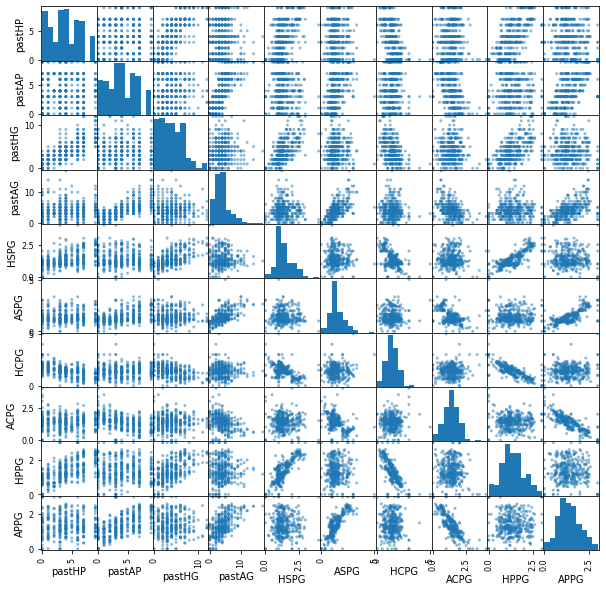

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['pastHP','pastAP','pastHG','pastAG','HSPG','ASPG','HCPG','ACPG','HPPG','APPG']], figsize=(10,10), grid=True)

In [9]:
X = data[["Home_code",'Away_code','Venue_code','pastHP','pastAP','pastHG','pastAG','pastHGC','pastAGC','pastHS','pastAS','pastHST','pastAST','pastHSC','pastASC','pastHSTC','pastASTC']]
Y = data[['FullTime']]
Y

,FullTime
0,2
1,2
2,2
3,0
4,2
...,...
375,0
376,2
377,2
378,0


In [10]:
X_train = X[10:240]
y_train = Y[10:240]
X_test = X[240:320]
y_test = Y[240:320]
X_predict = X[320:380]
y_predict = Y[320:380]


<AxesSubplot:>

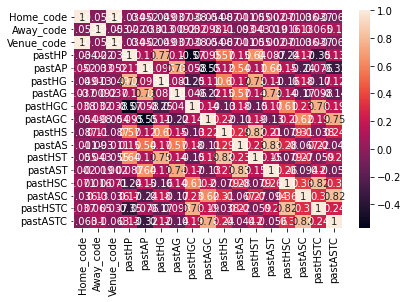

In [11]:
import seaborn
import os
r = X.corr()
seaborn.heatmap(r, annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
mask = ('pastHP','pastAP','pastHG','pastAG','pastHGC','pastAGC','pastHS','pastAS','pastHST','pastAST','pastHSC','pastASC','pastHSTC','pastASTC')
X_train.loc[:, mask] = scaler.fit_transform(X_train.loc[:, mask])
X_test.loc[:, mask] = scaler.transform(X_test.loc[:, mask])
X_predict.loc[:, mask] = scaler.transform(X_predict.loc[:, mask])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

<AxesSubplot:>

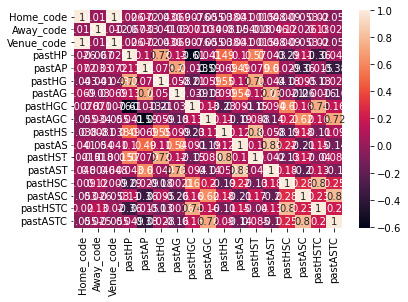

In [13]:
z = X_train.corr()
seaborn.heatmap(z, annot=True)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [15]:
import xgboost as xgb

In [16]:
param_init = {
    "objective": "multi:softmax",
    "num_class" : 3,
    "booster": "gbtree",
    "max_depth": 3, # default: 3 only for depthwise
    "n_estimators": 1500, # default: 500
    "learning_rate": 0.001, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 0.6,  # default:  1.0
    "colsample_bylevel": 0.5, # default: 1.0
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": 16, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
 
param_fit = {
    "eval_metric": ['auc','merror','mlogloss'],
    "early_stopping_rounds": 500, # default: 100
    "verbose": 2,
    "eval_set": [(X_train, y_train), (X_test, y_test)]
}
 
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(X_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21:16:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.75594	validation_0-merror:0.43478	validation_0-mlogloss:1.09837	validation_1-auc:0.56243	validation_1-merror:0.50000	validation_1-mlogloss:1.09851
[2]	validation_0-auc:0.82938	validation_0-merror:0.36957	validation_0-mlogloss:1.09787	validation_1-auc:0.63670	validation_1-merror:0.45000	validation_1-mlogloss:1.09822
[4]	validation_0-auc:0.85029	validation_0-merror:0.32174	validation_0-mlogloss:1.09737	validation_1-auc:0.67571	validation_1-merror:0.47500	validation_1-mlogloss:1.09789
[6]	validation_0-auc:0.86136	validation_0-merror:0.30435	validation_0-mlogloss:1.09692	validation_1-auc:0.66320	validation_1-merror:0.47500	validation_1-mlogloss:1.09766
[8]	validation_0-auc:0.86924	validation_0-merror:0.30870	validation_0-mlogloss:1.09649	validation_1-auc:0.65256	validation_1

[92]	validation_0-auc:0.90859	validation_0-merror:0.30435	validation_0-mlogloss:1.07863	validation_1-auc:0.66100	validation_1-merror:0.46250	validation_1-mlogloss:1.08785
[94]	validation_0-auc:0.90872	validation_0-merror:0.30870	validation_0-mlogloss:1.07824	validation_1-auc:0.66218	validation_1-merror:0.46250	validation_1-mlogloss:1.08755
[96]	validation_0-auc:0.90827	validation_0-merror:0.30870	validation_0-mlogloss:1.07774	validation_1-auc:0.66405	validation_1-merror:0.47500	validation_1-mlogloss:1.08731
[98]	validation_0-auc:0.90817	validation_0-merror:0.30870	validation_0-mlogloss:1.07736	validation_1-auc:0.66196	validation_1-merror:0.47500	validation_1-mlogloss:1.08709
[100]	validation_0-auc:0.90827	validation_0-merror:0.31304	validation_0-mlogloss:1.07698	validation_1-auc:0.66398	validation_1-merror:0.47500	validation_1-mlogloss:1.08688
[102]	validation_0-auc:0.91021	validation_0-merror:0.30435	validation_0-mlogloss:1.07657	validation_1-auc:0.66075	validation_1-merror:0.47500	va

[188]	validation_0-auc:0.91740	validation_0-merror:0.30435	validation_0-mlogloss:1.05872	validation_1-auc:0.65477	validation_1-merror:0.43750	validation_1-mlogloss:1.07804
[190]	validation_0-auc:0.91739	validation_0-merror:0.30435	validation_0-mlogloss:1.05835	validation_1-auc:0.65293	validation_1-merror:0.45000	validation_1-mlogloss:1.07787
[192]	validation_0-auc:0.91725	validation_0-merror:0.30435	validation_0-mlogloss:1.05798	validation_1-auc:0.65123	validation_1-merror:0.45000	validation_1-mlogloss:1.07770
[194]	validation_0-auc:0.91704	validation_0-merror:0.30870	validation_0-mlogloss:1.05765	validation_1-auc:0.65148	validation_1-merror:0.43750	validation_1-mlogloss:1.07756
[196]	validation_0-auc:0.91670	validation_0-merror:0.30000	validation_0-mlogloss:1.05727	validation_1-auc:0.65218	validation_1-merror:0.45000	validation_1-mlogloss:1.07737
[198]	validation_0-auc:0.91651	validation_0-merror:0.30870	validation_0-mlogloss:1.05689	validation_1-auc:0.65302	validation_1-merror:0.4375

[284]	validation_0-auc:0.91512	validation_0-merror:0.29565	validation_0-mlogloss:1.04013	validation_1-auc:0.65453	validation_1-merror:0.42500	validation_1-mlogloss:1.06911
[286]	validation_0-auc:0.91540	validation_0-merror:0.29565	validation_0-mlogloss:1.03979	validation_1-auc:0.65466	validation_1-merror:0.42500	validation_1-mlogloss:1.06887
[288]	validation_0-auc:0.91573	validation_0-merror:0.29565	validation_0-mlogloss:1.03943	validation_1-auc:0.65509	validation_1-merror:0.42500	validation_1-mlogloss:1.06867
[290]	validation_0-auc:0.91531	validation_0-merror:0.29565	validation_0-mlogloss:1.03907	validation_1-auc:0.65544	validation_1-merror:0.42500	validation_1-mlogloss:1.06839
[292]	validation_0-auc:0.91572	validation_0-merror:0.30000	validation_0-mlogloss:1.03873	validation_1-auc:0.65561	validation_1-merror:0.42500	validation_1-mlogloss:1.06824
[294]	validation_0-auc:0.91585	validation_0-merror:0.29565	validation_0-mlogloss:1.03834	validation_1-auc:0.65657	validation_1-merror:0.4125

[380]	validation_0-auc:0.91647	validation_0-merror:0.29130	validation_0-mlogloss:1.02249	validation_1-auc:0.65698	validation_1-merror:0.41250	validation_1-mlogloss:1.06063
[382]	validation_0-auc:0.91682	validation_0-merror:0.29565	validation_0-mlogloss:1.02211	validation_1-auc:0.65620	validation_1-merror:0.41250	validation_1-mlogloss:1.06046
[384]	validation_0-auc:0.91668	validation_0-merror:0.29130	validation_0-mlogloss:1.02172	validation_1-auc:0.65707	validation_1-merror:0.41250	validation_1-mlogloss:1.06025
[386]	validation_0-auc:0.91671	validation_0-merror:0.29565	validation_0-mlogloss:1.02135	validation_1-auc:0.65667	validation_1-merror:0.41250	validation_1-mlogloss:1.06007
[388]	validation_0-auc:0.91704	validation_0-merror:0.29565	validation_0-mlogloss:1.02101	validation_1-auc:0.65711	validation_1-merror:0.41250	validation_1-mlogloss:1.05994
[390]	validation_0-auc:0.91662	validation_0-merror:0.29130	validation_0-mlogloss:1.02060	validation_1-auc:0.65702	validation_1-merror:0.4125

[476]	validation_0-auc:0.91825	validation_0-merror:0.29130	validation_0-mlogloss:1.00558	validation_1-auc:0.65444	validation_1-merror:0.42500	validation_1-mlogloss:1.05284
[478]	validation_0-auc:0.91847	validation_0-merror:0.29130	validation_0-mlogloss:1.00524	validation_1-auc:0.65441	validation_1-merror:0.42500	validation_1-mlogloss:1.05268
[480]	validation_0-auc:0.91855	validation_0-merror:0.29130	validation_0-mlogloss:1.00490	validation_1-auc:0.65327	validation_1-merror:0.42500	validation_1-mlogloss:1.05249
[482]	validation_0-auc:0.91867	validation_0-merror:0.29130	validation_0-mlogloss:1.00458	validation_1-auc:0.65441	validation_1-merror:0.42500	validation_1-mlogloss:1.05234
[484]	validation_0-auc:0.91869	validation_0-merror:0.29130	validation_0-mlogloss:1.00429	validation_1-auc:0.65371	validation_1-merror:0.42500	validation_1-mlogloss:1.05224
[486]	validation_0-auc:0.91854	validation_0-merror:0.29130	validation_0-mlogloss:1.00400	validation_1-auc:0.65345	validation_1-merror:0.4250

[572]	validation_0-auc:0.92035	validation_0-merror:0.28261	validation_0-mlogloss:0.98978	validation_1-auc:0.65315	validation_1-merror:0.42500	validation_1-mlogloss:1.04620
[574]	validation_0-auc:0.92035	validation_0-merror:0.28261	validation_0-mlogloss:0.98950	validation_1-auc:0.65328	validation_1-merror:0.42500	validation_1-mlogloss:1.04605
[576]	validation_0-auc:0.92041	validation_0-merror:0.28261	validation_0-mlogloss:0.98916	validation_1-auc:0.65402	validation_1-merror:0.42500	validation_1-mlogloss:1.04594
[578]	validation_0-auc:0.92034	validation_0-merror:0.28261	validation_0-mlogloss:0.98881	validation_1-auc:0.65402	validation_1-merror:0.42500	validation_1-mlogloss:1.04577
[580]	validation_0-auc:0.92017	validation_0-merror:0.28261	validation_0-mlogloss:0.98848	validation_1-auc:0.65333	validation_1-merror:0.42500	validation_1-mlogloss:1.04562
[582]	validation_0-auc:0.92029	validation_0-merror:0.28261	validation_0-mlogloss:0.98812	validation_1-auc:0.65389	validation_1-merror:0.4250

[668]	validation_0-auc:0.92183	validation_0-merror:0.28261	validation_0-mlogloss:0.97468	validation_1-auc:0.65559	validation_1-merror:0.42500	validation_1-mlogloss:1.03988
[670]	validation_0-auc:0.92228	validation_0-merror:0.28261	validation_0-mlogloss:0.97434	validation_1-auc:0.65629	validation_1-merror:0.42500	validation_1-mlogloss:1.03976
[672]	validation_0-auc:0.92227	validation_0-merror:0.28261	validation_0-mlogloss:0.97404	validation_1-auc:0.65729	validation_1-merror:0.42500	validation_1-mlogloss:1.03960
[674]	validation_0-auc:0.92242	validation_0-merror:0.28261	validation_0-mlogloss:0.97373	validation_1-auc:0.65699	validation_1-merror:0.42500	validation_1-mlogloss:1.03949
[676]	validation_0-auc:0.92243	validation_0-merror:0.28261	validation_0-mlogloss:0.97341	validation_1-auc:0.65628	validation_1-merror:0.43750	validation_1-mlogloss:1.03937
[678]	validation_0-auc:0.92246	validation_0-merror:0.28261	validation_0-mlogloss:0.97311	validation_1-auc:0.65668	validation_1-merror:0.4375

[764]	validation_0-auc:0.92543	validation_0-merror:0.27391	validation_0-mlogloss:0.96025	validation_1-auc:0.65672	validation_1-merror:0.43750	validation_1-mlogloss:1.03467
[766]	validation_0-auc:0.92543	validation_0-merror:0.27391	validation_0-mlogloss:0.95995	validation_1-auc:0.65702	validation_1-merror:0.43750	validation_1-mlogloss:1.03460
[768]	validation_0-auc:0.92541	validation_0-merror:0.27391	validation_0-mlogloss:0.95966	validation_1-auc:0.65676	validation_1-merror:0.43750	validation_1-mlogloss:1.03449
[770]	validation_0-auc:0.92560	validation_0-merror:0.27391	validation_0-mlogloss:0.95939	validation_1-auc:0.65624	validation_1-merror:0.43750	validation_1-mlogloss:1.03444
[772]	validation_0-auc:0.92563	validation_0-merror:0.27391	validation_0-mlogloss:0.95906	validation_1-auc:0.65694	validation_1-merror:0.45000	validation_1-mlogloss:1.03428
[774]	validation_0-auc:0.92572	validation_0-merror:0.27391	validation_0-mlogloss:0.95882	validation_1-auc:0.65659	validation_1-merror:0.4500

[858]	validation_0-auc:0.92769	validation_0-merror:0.27826	validation_0-mlogloss:0.94663	validation_1-auc:0.65323	validation_1-merror:0.43750	validation_1-mlogloss:1.03018
[860]	validation_0-auc:0.92753	validation_0-merror:0.27826	validation_0-mlogloss:0.94637	validation_1-auc:0.65262	validation_1-merror:0.43750	validation_1-mlogloss:1.03008
[862]	validation_0-auc:0.92762	validation_0-merror:0.27391	validation_0-mlogloss:0.94610	validation_1-auc:0.65297	validation_1-merror:0.45000	validation_1-mlogloss:1.02999
[864]	validation_0-auc:0.92754	validation_0-merror:0.27391	validation_0-mlogloss:0.94582	validation_1-auc:0.65350	validation_1-merror:0.45000	validation_1-mlogloss:1.02981
[866]	validation_0-auc:0.92754	validation_0-merror:0.27826	validation_0-mlogloss:0.94554	validation_1-auc:0.65384	validation_1-merror:0.45000	validation_1-mlogloss:1.02968
[868]	validation_0-auc:0.92765	validation_0-merror:0.27391	validation_0-mlogloss:0.94525	validation_1-auc:0.65393	validation_1-merror:0.4500

[954]	validation_0-auc:0.93018	validation_0-merror:0.27391	validation_0-mlogloss:0.93346	validation_1-auc:0.65411	validation_1-merror:0.46250	validation_1-mlogloss:1.02632
[956]	validation_0-auc:0.93035	validation_0-merror:0.27391	validation_0-mlogloss:0.93318	validation_1-auc:0.65389	validation_1-merror:0.46250	validation_1-mlogloss:1.02626
[958]	validation_0-auc:0.93041	validation_0-merror:0.27391	validation_0-mlogloss:0.93294	validation_1-auc:0.65389	validation_1-merror:0.46250	validation_1-mlogloss:1.02614
[960]	validation_0-auc:0.93039	validation_0-merror:0.27391	validation_0-mlogloss:0.93269	validation_1-auc:0.65250	validation_1-merror:0.46250	validation_1-mlogloss:1.02618
[962]	validation_0-auc:0.93053	validation_0-merror:0.26957	validation_0-mlogloss:0.93234	validation_1-auc:0.65324	validation_1-merror:0.46250	validation_1-mlogloss:1.02606
[964]	validation_0-auc:0.93065	validation_0-merror:0.26957	validation_0-mlogloss:0.93204	validation_1-auc:0.65354	validation_1-merror:0.4625

[1050]	validation_0-auc:0.93293	validation_0-merror:0.26957	validation_0-mlogloss:0.92015	validation_1-auc:0.65507	validation_1-merror:0.46250	validation_1-mlogloss:1.02180
[1052]	validation_0-auc:0.93299	validation_0-merror:0.26957	validation_0-mlogloss:0.91987	validation_1-auc:0.65572	validation_1-merror:0.46250	validation_1-mlogloss:1.02169
[1054]	validation_0-auc:0.93293	validation_0-merror:0.26957	validation_0-mlogloss:0.91961	validation_1-auc:0.65494	validation_1-merror:0.46250	validation_1-mlogloss:1.02162
[1056]	validation_0-auc:0.93304	validation_0-merror:0.26522	validation_0-mlogloss:0.91932	validation_1-auc:0.65476	validation_1-merror:0.46250	validation_1-mlogloss:1.02147
[1058]	validation_0-auc:0.93305	validation_0-merror:0.26522	validation_0-mlogloss:0.91906	validation_1-auc:0.65516	validation_1-merror:0.46250	validation_1-mlogloss:1.02136
[1060]	validation_0-auc:0.93299	validation_0-merror:0.26522	validation_0-mlogloss:0.91880	validation_1-auc:0.65442	validation_1-merror:

[1146]	validation_0-auc:0.93491	validation_0-merror:0.25652	validation_0-mlogloss:0.90789	validation_1-auc:0.65360	validation_1-merror:0.47500	validation_1-mlogloss:1.01885
[1148]	validation_0-auc:0.93496	validation_0-merror:0.25652	validation_0-mlogloss:0.90765	validation_1-auc:0.65329	validation_1-merror:0.47500	validation_1-mlogloss:1.01874
[1150]	validation_0-auc:0.93494	validation_0-merror:0.25652	validation_0-mlogloss:0.90737	validation_1-auc:0.65268	validation_1-merror:0.47500	validation_1-mlogloss:1.01867
[1152]	validation_0-auc:0.93500	validation_0-merror:0.25652	validation_0-mlogloss:0.90716	validation_1-auc:0.65299	validation_1-merror:0.47500	validation_1-mlogloss:1.01866
[1154]	validation_0-auc:0.93502	validation_0-merror:0.25217	validation_0-mlogloss:0.90689	validation_1-auc:0.65290	validation_1-merror:0.47500	validation_1-mlogloss:1.01851
[1156]	validation_0-auc:0.93511	validation_0-merror:0.25217	validation_0-mlogloss:0.90660	validation_1-auc:0.65308	validation_1-merror:

[1242]	validation_0-auc:0.93662	validation_0-merror:0.25217	validation_0-mlogloss:0.89580	validation_1-auc:0.65234	validation_1-merror:0.48750	validation_1-mlogloss:1.01594
[1244]	validation_0-auc:0.93651	validation_0-merror:0.25217	validation_0-mlogloss:0.89559	validation_1-auc:0.65234	validation_1-merror:0.48750	validation_1-mlogloss:1.01589
[1246]	validation_0-auc:0.93650	validation_0-merror:0.25217	validation_0-mlogloss:0.89536	validation_1-auc:0.65199	validation_1-merror:0.48750	validation_1-mlogloss:1.01586
[1248]	validation_0-auc:0.93663	validation_0-merror:0.25217	validation_0-mlogloss:0.89511	validation_1-auc:0.65181	validation_1-merror:0.48750	validation_1-mlogloss:1.01582
[1250]	validation_0-auc:0.93657	validation_0-merror:0.25217	validation_0-mlogloss:0.89484	validation_1-auc:0.65181	validation_1-merror:0.48750	validation_1-mlogloss:1.01576
[1252]	validation_0-auc:0.93669	validation_0-merror:0.25217	validation_0-mlogloss:0.89461	validation_1-auc:0.65199	validation_1-merror:

[1338]	validation_0-auc:0.93897	validation_0-merror:0.25217	validation_0-mlogloss:0.88405	validation_1-auc:0.65234	validation_1-merror:0.48750	validation_1-mlogloss:1.01316
[1340]	validation_0-auc:0.93884	validation_0-merror:0.25217	validation_0-mlogloss:0.88380	validation_1-auc:0.65291	validation_1-merror:0.48750	validation_1-mlogloss:1.01308
[1342]	validation_0-auc:0.93883	validation_0-merror:0.25217	validation_0-mlogloss:0.88357	validation_1-auc:0.65273	validation_1-merror:0.48750	validation_1-mlogloss:1.01302
[1344]	validation_0-auc:0.93889	validation_0-merror:0.24783	validation_0-mlogloss:0.88332	validation_1-auc:0.65299	validation_1-merror:0.48750	validation_1-mlogloss:1.01300
[1346]	validation_0-auc:0.93880	validation_0-merror:0.24783	validation_0-mlogloss:0.88310	validation_1-auc:0.65299	validation_1-merror:0.48750	validation_1-mlogloss:1.01295
[1348]	validation_0-auc:0.93887	validation_0-merror:0.24348	validation_0-mlogloss:0.88286	validation_1-auc:0.65256	validation_1-merror:

[1432]	validation_0-auc:0.94039	validation_0-merror:0.23913	validation_0-mlogloss:0.87306	validation_1-auc:0.65069	validation_1-merror:0.48750	validation_1-mlogloss:1.01103
[1434]	validation_0-auc:0.94042	validation_0-merror:0.23913	validation_0-mlogloss:0.87281	validation_1-auc:0.65030	validation_1-merror:0.48750	validation_1-mlogloss:1.01093
[1436]	validation_0-auc:0.94048	validation_0-merror:0.23913	validation_0-mlogloss:0.87257	validation_1-auc:0.65073	validation_1-merror:0.48750	validation_1-mlogloss:1.01091
[1438]	validation_0-auc:0.94042	validation_0-merror:0.23913	validation_0-mlogloss:0.87232	validation_1-auc:0.65047	validation_1-merror:0.47500	validation_1-mlogloss:1.01081
[1440]	validation_0-auc:0.94057	validation_0-merror:0.23913	validation_0-mlogloss:0.87208	validation_1-auc:0.65073	validation_1-merror:0.47500	validation_1-mlogloss:1.01077
[1442]	validation_0-auc:0.94060	validation_0-merror:0.23913	validation_0-mlogloss:0.87189	validation_1-auc:0.65025	validation_1-merror:

In [17]:
clf_XGB = xgb_model.fit(X_train,y_train)

[21:17:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [18]:
y_pred_XGB = clf_XGB.predict(X_test)

In [19]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt

Confusion matrix, without normalization
[[13  1 18]
 [ 2  2  5]
 [ 8  4 27]]


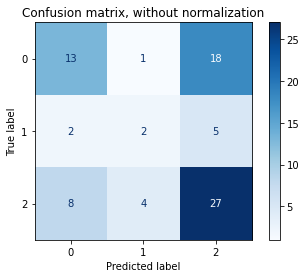

Normalized confusion matrix
[[0.40625    0.03125    0.5625    ]
 [0.22222222 0.22222222 0.55555556]
 [0.20512821 0.1025641  0.69230769]]


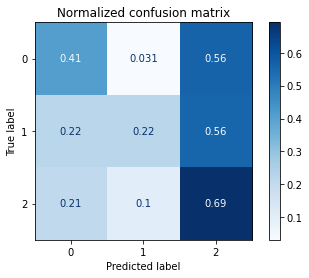

In [20]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=[0, 1, 2]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_XGB, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

In [21]:
accuracy_score(y_pred_XGB, y_test)

0.525

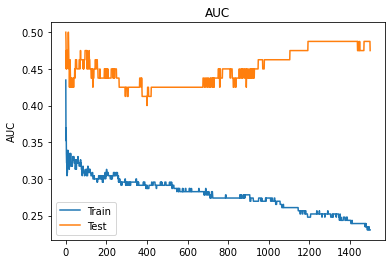

In [22]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('AUC')
plt.show()

In [23]:
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastHS-AS'] = data['pastHS']-data['pastAS']
data['pastHST-AST'] = data['pastHST']-data['pastAST']
data['pastHGC-AGC'] = data['pastHGC']-data['pastAGC']
data['pastHSC-ASC'] = data['pastHSC']-data['pastASC']
data['pastHSTC-ASTC'] = data['pastHSTC']-data['pastASTC']
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['pastASC-HSC'] = data['pastASC']-data['pastHSC']
data['pastASTC-HSTC'] = data['pastASTC']-data['pastHSTC']

In [24]:
#"Home_code",'Away_code','Venue_code','pastHP-AP','pastHG-AG','pastHS-AS','pastHST-AST','pastHGC-AGC','pastHSC-ASC','pastHSTC-ASTC'

In [25]:
x = data[["Home_code",'Away_code','Venue_code','pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS','pastHST-AST','pastASC-HSC','pastASTC-HSTC']]

In [26]:
x_train = x[10:240]
x_test = x[240:320]

<AxesSubplot:>

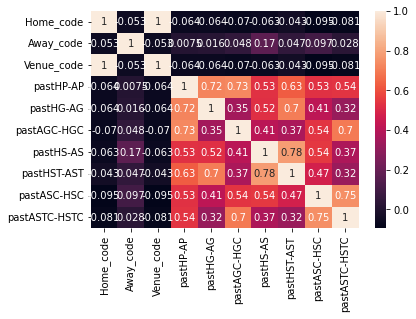

In [27]:
m = x.corr()
seaborn.heatmap(m, annot=True)

In [28]:
scaler = StandardScaler()
mask = ('Home_code','Away_code','Venue_code','pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS','pastHST-AST','pastASC-HSC','pastASTC-HSTC')
x_train.loc[:, mask] = scaler.fit_transform(x_train.loc[:, mask])
x_test.loc[:, mask] = scaler.transform(x_test.loc[:, mask])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<AxesSubplot:>

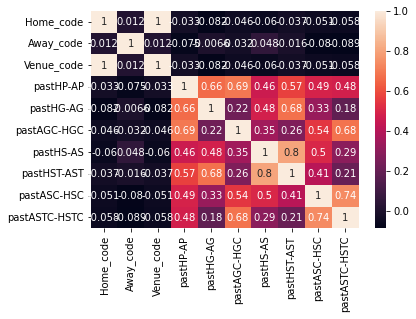

In [29]:
n = x_train.corr()
seaborn.heatmap(n, annot=True)

In [30]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [31]:
param_init = {
    "objective": "multi:softmax",
    "num_class" : 3,
    "booster": "gbtree",
    "max_depth": 3, # default: 3 only for depthwise
    "n_estimators": 1000, # default: 500
    "learning_rate": 0.001, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 0.6,  # default:  1.0
    "colsample_bylevel": 0.5, # default: 1.0
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": 16, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
 
param_fit = {
    "eval_metric": ['auc','merror','mlogloss'],
    "early_stopping_rounds": 500, # default: 100
    "verbose": 2,
    "eval_set": [(x_train, y_train), (x_test, y_test)]
}
 
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(x_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

[21:17:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.72822	validation_0-merror:0.45217	validation_0-mlogloss:1.09841	validation_1-auc:0.57775	validation_1-merror:0.51250	validation_1-mlogloss:1.09850
[2]	validation_0-auc:0.78452	validation_0-merror:0.39565	validation_0-mlogloss:1.09801	validation_1-auc:0.68511	validation_1-merror:0.51250	validation_1-mlogloss:1.09821
[4]	validation_0-auc:0.81085	validation_0-merror:0.37826	validation_0-mlogloss:1.09760	validation_1-auc:0.64938	validation_1-merror:0.51250	validation_1-mlogloss:1.09803
[6]	validation_0-auc:0.81958	validation_0-merror:0.37826	validation_0-mlogloss:1.09719	validation_1-auc:0.64219	validation_1-merror:0.51250	validation_1-mlogloss:1.09786
[8]	validation_0-auc:0.83165	validation_0-merror:0.37391	validation_0-mlogloss:1.09677	validation_1-auc:0.66027	validation_1

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-auc:0.85655	validation_0-merror:0.37826	validation_0-mlogloss:1.09278	validation_1-auc:0.67238	validation_1-merror:0.42500	validation_1-mlogloss:1.09495
[30]	validation_0-auc:0.85653	validation_0-merror:0.38261	validation_0-mlogloss:1.09237	validation_1-auc:0.67203	validation_1-merror:0.41250	validation_1-mlogloss:1.09465
[32]	validation_0-auc:0.85558	validation_0-merror:0.36957	validation_0-mlogloss:1.09195	validation_1-auc:0.67386	validation_1-merror:0.42500	validation_1-mlogloss:1.09437
[34]	validation_0-auc:0.85734	validation_0-merror:0.36522	validation_0-mlogloss:1.09153	validation_1-auc:0.68061	validation_1-merror:0.41250	validation_1-mlogloss:1.09412
[36]	validation_0-auc:0.85776	validation_0-merror:0.35652	validation_0-mlogloss:1.09114	validation_1-auc:0.67863	validation_1-merror:0.40000	validation_1-mlogloss:1.09386
[38]	validation_0-auc:0.85790	validation_0-merror:0.35652	validation_0-mlogloss:1.09079	validation_1-auc:0.67980	validation_1-merror:0.40000	vali

[124]	validation_0-auc:0.86819	validation_0-merror:0.34783	validation_0-mlogloss:1.07460	validation_1-auc:0.69166	validation_1-merror:0.41250	validation_1-mlogloss:1.08356
[126]	validation_0-auc:0.86826	validation_0-merror:0.34783	validation_0-mlogloss:1.07422	validation_1-auc:0.69074	validation_1-merror:0.41250	validation_1-mlogloss:1.08327
[128]	validation_0-auc:0.86834	validation_0-merror:0.34783	validation_0-mlogloss:1.07386	validation_1-auc:0.69110	validation_1-merror:0.40000	validation_1-mlogloss:1.08301
[130]	validation_0-auc:0.86820	validation_0-merror:0.34783	validation_0-mlogloss:1.07351	validation_1-auc:0.69179	validation_1-merror:0.40000	validation_1-mlogloss:1.08273
[132]	validation_0-auc:0.86837	validation_0-merror:0.34783	validation_0-mlogloss:1.07315	validation_1-auc:0.69288	validation_1-merror:0.40000	validation_1-mlogloss:1.08244
[134]	validation_0-auc:0.86821	validation_0-merror:0.34783	validation_0-mlogloss:1.07283	validation_1-auc:0.69157	validation_1-merror:0.4000

[220]	validation_0-auc:0.86906	validation_0-merror:0.35652	validation_0-mlogloss:1.05750	validation_1-auc:0.69792	validation_1-merror:0.40000	validation_1-mlogloss:1.07214
[222]	validation_0-auc:0.86884	validation_0-merror:0.35652	validation_0-mlogloss:1.05716	validation_1-auc:0.69758	validation_1-merror:0.40000	validation_1-mlogloss:1.07190
[224]	validation_0-auc:0.86832	validation_0-merror:0.35652	validation_0-mlogloss:1.05682	validation_1-auc:0.69658	validation_1-merror:0.40000	validation_1-mlogloss:1.07175
[226]	validation_0-auc:0.86853	validation_0-merror:0.35652	validation_0-mlogloss:1.05650	validation_1-auc:0.69684	validation_1-merror:0.40000	validation_1-mlogloss:1.07156
[228]	validation_0-auc:0.86874	validation_0-merror:0.35652	validation_0-mlogloss:1.05617	validation_1-auc:0.69645	validation_1-merror:0.40000	validation_1-mlogloss:1.07141
[230]	validation_0-auc:0.86896	validation_0-merror:0.35652	validation_0-mlogloss:1.05583	validation_1-auc:0.69632	validation_1-merror:0.4000

[316]	validation_0-auc:0.87002	validation_0-merror:0.35652	validation_0-mlogloss:1.04142	validation_1-auc:0.69645	validation_1-merror:0.37500	validation_1-mlogloss:1.06247
[318]	validation_0-auc:0.86993	validation_0-merror:0.34783	validation_0-mlogloss:1.04110	validation_1-auc:0.69580	validation_1-merror:0.37500	validation_1-mlogloss:1.06231
[320]	validation_0-auc:0.86986	validation_0-merror:0.34783	validation_0-mlogloss:1.04078	validation_1-auc:0.69410	validation_1-merror:0.37500	validation_1-mlogloss:1.06218
[322]	validation_0-auc:0.87055	validation_0-merror:0.34783	validation_0-mlogloss:1.04045	validation_1-auc:0.69515	validation_1-merror:0.37500	validation_1-mlogloss:1.06201
[324]	validation_0-auc:0.87012	validation_0-merror:0.34783	validation_0-mlogloss:1.04011	validation_1-auc:0.69497	validation_1-merror:0.37500	validation_1-mlogloss:1.06171
[326]	validation_0-auc:0.87024	validation_0-merror:0.35217	validation_0-mlogloss:1.03986	validation_1-auc:0.69476	validation_1-merror:0.3750

[412]	validation_0-auc:0.86912	validation_0-merror:0.34348	validation_0-mlogloss:1.02630	validation_1-auc:0.69303	validation_1-merror:0.38750	validation_1-mlogloss:1.05347
[414]	validation_0-auc:0.86921	validation_0-merror:0.34783	validation_0-mlogloss:1.02598	validation_1-auc:0.69316	validation_1-merror:0.38750	validation_1-mlogloss:1.05324
[416]	validation_0-auc:0.86943	validation_0-merror:0.34348	validation_0-mlogloss:1.02567	validation_1-auc:0.69290	validation_1-merror:0.38750	validation_1-mlogloss:1.05302
[418]	validation_0-auc:0.86954	validation_0-merror:0.34348	validation_0-mlogloss:1.02539	validation_1-auc:0.69351	validation_1-merror:0.38750	validation_1-mlogloss:1.05291
[420]	validation_0-auc:0.86986	validation_0-merror:0.33913	validation_0-mlogloss:1.02508	validation_1-auc:0.69390	validation_1-merror:0.38750	validation_1-mlogloss:1.05266
[422]	validation_0-auc:0.86960	validation_0-merror:0.33913	validation_0-mlogloss:1.02478	validation_1-auc:0.69407	validation_1-merror:0.3875

[508]	validation_0-auc:0.87162	validation_0-merror:0.33478	validation_0-mlogloss:1.01192	validation_1-auc:0.69795	validation_1-merror:0.38750	validation_1-mlogloss:1.04474
[510]	validation_0-auc:0.87164	validation_0-merror:0.33478	validation_0-mlogloss:1.01167	validation_1-auc:0.69852	validation_1-merror:0.38750	validation_1-mlogloss:1.04450
[512]	validation_0-auc:0.87170	validation_0-merror:0.33478	validation_0-mlogloss:1.01140	validation_1-auc:0.69822	validation_1-merror:0.38750	validation_1-mlogloss:1.04437
[514]	validation_0-auc:0.87162	validation_0-merror:0.33478	validation_0-mlogloss:1.01113	validation_1-auc:0.69852	validation_1-merror:0.38750	validation_1-mlogloss:1.04423
[516]	validation_0-auc:0.87149	validation_0-merror:0.33478	validation_0-mlogloss:1.01088	validation_1-auc:0.69830	validation_1-merror:0.38750	validation_1-mlogloss:1.04406
[518]	validation_0-auc:0.87163	validation_0-merror:0.33478	validation_0-mlogloss:1.01057	validation_1-auc:0.69835	validation_1-merror:0.3875

[604]	validation_0-auc:0.87378	validation_0-merror:0.33913	validation_0-mlogloss:0.99887	validation_1-auc:0.69940	validation_1-merror:0.38750	validation_1-mlogloss:1.03688
[606]	validation_0-auc:0.87419	validation_0-merror:0.33913	validation_0-mlogloss:0.99858	validation_1-auc:0.70004	validation_1-merror:0.38750	validation_1-mlogloss:1.03677
[608]	validation_0-auc:0.87427	validation_0-merror:0.33913	validation_0-mlogloss:0.99828	validation_1-auc:0.70018	validation_1-merror:0.37500	validation_1-mlogloss:1.03657
[610]	validation_0-auc:0.87401	validation_0-merror:0.33913	validation_0-mlogloss:0.99808	validation_1-auc:0.69939	validation_1-merror:0.38750	validation_1-mlogloss:1.03648
[612]	validation_0-auc:0.87417	validation_0-merror:0.33913	validation_0-mlogloss:0.99779	validation_1-auc:0.69969	validation_1-merror:0.38750	validation_1-mlogloss:1.03635
[614]	validation_0-auc:0.87428	validation_0-merror:0.33913	validation_0-mlogloss:0.99752	validation_1-auc:0.69974	validation_1-merror:0.3750

[700]	validation_0-auc:0.87679	validation_0-merror:0.33478	validation_0-mlogloss:0.98609	validation_1-auc:0.69987	validation_1-merror:0.40000	validation_1-mlogloss:1.03012
[702]	validation_0-auc:0.87685	validation_0-merror:0.33043	validation_0-mlogloss:0.98577	validation_1-auc:0.69961	validation_1-merror:0.40000	validation_1-mlogloss:1.03000
[704]	validation_0-auc:0.87700	validation_0-merror:0.33043	validation_0-mlogloss:0.98551	validation_1-auc:0.69952	validation_1-merror:0.40000	validation_1-mlogloss:1.02989
[706]	validation_0-auc:0.87704	validation_0-merror:0.33478	validation_0-mlogloss:0.98527	validation_1-auc:0.69952	validation_1-merror:0.40000	validation_1-mlogloss:1.02979
[708]	validation_0-auc:0.87713	validation_0-merror:0.33478	validation_0-mlogloss:0.98501	validation_1-auc:0.70017	validation_1-merror:0.40000	validation_1-mlogloss:1.02968
[710]	validation_0-auc:0.87732	validation_0-merror:0.33478	validation_0-mlogloss:0.98476	validation_1-auc:0.69961	validation_1-merror:0.4000

[796]	validation_0-auc:0.87954	validation_0-merror:0.31739	validation_0-mlogloss:0.97403	validation_1-auc:0.69808	validation_1-merror:0.40000	validation_1-mlogloss:1.02449
[798]	validation_0-auc:0.87940	validation_0-merror:0.31739	validation_0-mlogloss:0.97374	validation_1-auc:0.69800	validation_1-merror:0.40000	validation_1-mlogloss:1.02434
[800]	validation_0-auc:0.87933	validation_0-merror:0.31739	validation_0-mlogloss:0.97349	validation_1-auc:0.69813	validation_1-merror:0.40000	validation_1-mlogloss:1.02420
[802]	validation_0-auc:0.87934	validation_0-merror:0.31739	validation_0-mlogloss:0.97325	validation_1-auc:0.69765	validation_1-merror:0.40000	validation_1-mlogloss:1.02417
[804]	validation_0-auc:0.87949	validation_0-merror:0.31739	validation_0-mlogloss:0.97296	validation_1-auc:0.69878	validation_1-merror:0.40000	validation_1-mlogloss:1.02411
[806]	validation_0-auc:0.87965	validation_0-merror:0.31739	validation_0-mlogloss:0.97269	validation_1-auc:0.69734	validation_1-merror:0.4000

[892]	validation_0-auc:0.88071	validation_0-merror:0.30870	validation_0-mlogloss:0.96234	validation_1-auc:0.69690	validation_1-merror:0.40000	validation_1-mlogloss:1.01880
[894]	validation_0-auc:0.88079	validation_0-merror:0.30435	validation_0-mlogloss:0.96212	validation_1-auc:0.69651	validation_1-merror:0.40000	validation_1-mlogloss:1.01871
[896]	validation_0-auc:0.88077	validation_0-merror:0.30435	validation_0-mlogloss:0.96189	validation_1-auc:0.69664	validation_1-merror:0.40000	validation_1-mlogloss:1.01867
[898]	validation_0-auc:0.88068	validation_0-merror:0.30870	validation_0-mlogloss:0.96162	validation_1-auc:0.69611	validation_1-merror:0.38750	validation_1-mlogloss:1.01850
[900]	validation_0-auc:0.88056	validation_0-merror:0.30870	validation_0-mlogloss:0.96135	validation_1-auc:0.69668	validation_1-merror:0.40000	validation_1-mlogloss:1.01833
[902]	validation_0-auc:0.88067	validation_0-merror:0.30870	validation_0-mlogloss:0.96110	validation_1-auc:0.69694	validation_1-merror:0.3875

[988]	validation_0-auc:0.88251	validation_0-merror:0.30435	validation_0-mlogloss:0.95108	validation_1-auc:0.69864	validation_1-merror:0.40000	validation_1-mlogloss:1.01339
[990]	validation_0-auc:0.88258	validation_0-merror:0.30435	validation_0-mlogloss:0.95089	validation_1-auc:0.69715	validation_1-merror:0.40000	validation_1-mlogloss:1.01329
[992]	validation_0-auc:0.88246	validation_0-merror:0.30435	validation_0-mlogloss:0.95071	validation_1-auc:0.69711	validation_1-merror:0.40000	validation_1-mlogloss:1.01326
[994]	validation_0-auc:0.88244	validation_0-merror:0.30435	validation_0-mlogloss:0.95048	validation_1-auc:0.69755	validation_1-merror:0.40000	validation_1-mlogloss:1.01312
[996]	validation_0-auc:0.88240	validation_0-merror:0.30435	validation_0-mlogloss:0.95027	validation_1-auc:0.69789	validation_1-merror:0.40000	validation_1-mlogloss:1.01305
[998]	validation_0-auc:0.88258	validation_0-merror:0.30435	validation_0-mlogloss:0.95004	validation_1-auc:0.69733	validation_1-merror:0.4000

In [32]:
clf_XGB2 = xgb_model.fit(x_train,y_train)

[21:17:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [33]:
y_pred_XGB2 = clf_XGB2.predict(x_test)

Confusion matrix, without normalization
[[18  3 11]
 [ 0  2  7]
 [ 8  3 28]]


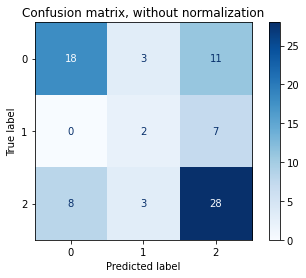

Normalized confusion matrix
[[0.5625     0.09375    0.34375   ]
 [0.         0.22222222 0.77777778]
 [0.20512821 0.07692308 0.71794872]]


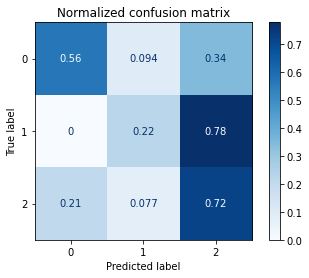

In [34]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=[0, 1, 2]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_XGB2, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

In [35]:
accuracy_score(y_pred_XGB2, y_test)

0.6